In [46]:
import os 


# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monitoring
from tqdm.notebook import tqdm

# IO
from os.path import join, exists, basename, dirname, splitext, expanduser
from glob import glob

# Parallel processing
from joblib import Parallel, delayed
import geopandas as gpd

from astra.plot.utils import latexify


In [47]:
shapefile_path="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/shapefiles/india_districtwise_shapefile_2022/DISTRICT_BOUNDARY.shp"

df = gpd.read_file(shapefile_path).to_crs(epsg=4326)

In [48]:
display(df.head())


,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJAR>T,None,24,673,539476.764723,4.791280e+09,"POLYGON ((71.1172 23.21252, 71.11778 23.21247,..."
1,AHMAD>B>D,GUJAR>T,None,24,438,857254.094647,6.966374e+09,"POLYGON ((71.97206 23.05747, 71.97204 23.05749..."
2,>NAND,GUJAR>T,None,24,440,393046.690523,3.054307e+09,"POLYGON ((73.02614 22.73478, 73.02693 22.73474..."
3,DEVBHUMI DW>RKA,GUJAR>T,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((69.33941 22.38597, 69.33976 22..."
4,J>MNAGAR,GUJAR>T,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((70.5365 22.40753, 70.53635 22...."


In [49]:
df['District'] = df['District'].str.replace('>', 'A')
df['STATE'] = df['STATE'].str.replace('>', 'A')
df['District'] = df['District'].str.replace('|', 'I')
display(df.head())

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJARAT,None,24,673,539476.764723,4.791280e+09,"POLYGON ((71.1172 23.21252, 71.11778 23.21247,..."
1,AHMADABAD,GUJARAT,None,24,438,857254.094647,6.966374e+09,"POLYGON ((71.97206 23.05747, 71.97204 23.05749..."
2,ANAND,GUJARAT,None,24,440,393046.690523,3.054307e+09,"POLYGON ((73.02614 22.73478, 73.02693 22.73474..."
3,DEVBHUMI DWARKA,GUJARAT,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((69.33941 22.38597, 69.33976 22..."
4,JAMNAGAR,GUJARAT,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((70.5365 22.40753, 70.53635 22...."


In [50]:
## display the shapefile where district name is "central delhi"
df[df['STATE'] == 'DELHI']



,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
79,CENTRAL,DELHI,None,7,77,92366.024115,1.031860e+08,"POLYGON ((77.2143 28.78524, 77.21521 28.78514,..."
127,EAST,DELHI,None,7,78,24536.830597,3.051072e+07,"POLYGON ((77.28857 28.65789, 77.28915 28.65786..."
266,NEW DELHI,DELHI,None,7,79,80699.250792,1.516238e+08,"POLYGON ((77.20369 28.64315, 77.20406 28.64298..."
269,NORTH,DELHI,None,7,80,110611.976578,2.821832e+08,"POLYGON ((77.09917 28.87068, 77.09999 28.87062..."
272,NORTH EAST,DELHI,None,7,81,47370.029510,3.420590e+07,"POLYGON ((77.23588 28.77073, 77.23606 28.76963..."
275,NORTH WEST,DELHI,None,7,82,93419.727279,1.490329e+08,"POLYGON ((76.96044 28.81534, 76.96176 28.81481..."
324,SHAHADRA,DELHI,None,7,671,33443.796616,3.328784e+07,"POLYGON ((77.32015 28.713, 77.32036 28.71291, ..."
344,SOUTH,DELHI,None,7,83,69956.042370,1.541412e+08,"MULTIPOLYGON (((77.23676 28.5578, 77.23683 28...."
350,SOUTH WEST,DELHI,None,7,84,111613.647824,2.741778e+08,"POLYGON ((76.95268 28.66884, 76.95287 28.66848..."
382,WEST,DELHI,None,7,85,73954.338201,1.272090e+08,"POLYGON ((76.97643 28.69939, 76.9763 28.69916,..."


In [51]:
df[df['STATE']=='HARYANA']

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
445,AMBALA,HARYANA,None,6,58,379482.603591,1.473788e+09,"MULTIPOLYGON (((76.63833 30.14762, 76.63776 30..."
461,BHIWANI,HARYANA,None,6,59,386681.018029,3.186629e+09,"POLYGON ((76.01183 29.06029, 76.01279 29.06018..."
478,FARIDABAD,HARYANA,None,6,60,151373.000898,7.188564e+08,"MULTIPOLYGON (((77.16826 28.2933, 77.16954 28...."
480,FATEHABAD,HARYANA,None,6,61,325531.834462,2.453477e+09,"POLYGON ((75.8004 29.80726, 75.80152 29.80656,..."
489,GURUGRAM,HARYANA,None,6,62,248625.676773,1.209068e+09,"POLYGON ((77.00884 28.54034, 77.00947 28.53992..."
492,HISAR,HARYANA,None,6,63,419949.440637,3.950343e+09,"POLYGON ((75.94347 29.57496, 75.94418 29.57496..."
502,JHAJJAR,HARYANA,None,6,64,309139.087580,1.798824e+09,"POLYGON ((76.66888 28.80487, 76.66903 28.80433..."
503,JIND,HARYANA,None,6,65,405414.555191,2.649068e+09,"POLYGON ((76.20214 29.84311, 76.20269 29.84301..."
504,KAITHAL,HARYANA,None,6,66,361977.802493,2.209712e+09,"POLYGON ((76.42274 30.19224, 76.42352 30.1917,..."
507,KARNAL,HARYANA,None,6,67,349782.077342,2.405777e+09,"POLYGON ((77.11882 29.99219, 77.11982 29.99117..."


In [52]:
df[df['STATE']=='UTTAR PRADESH']

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
13,AGRA,UTTAR PRADESH,None,9,118,787929.478603,3.902791e+09,"POLYGON ((78.18117 27.40699, 78.18201 27.4065,..."
16,ALIGARH,UTTAR PRADESH,None,9,119,498779.443328,3.585997e+09,"POLYGON ((77.84597 28.17343, 77.84706 28.17249..."
21,AMBEDKARNAGAR,UTTAR PRADESH,None,9,121,384817.943754,2.242461e+09,"POLYGON ((82.49758 26.6373, 82.49814 26.63724,..."
22,AMETHI,UTTAR PRADESH,None,9,640,396742.737994,2.336052e+09,"POLYGON ((81.58321 26.65383, 81.58875 26.65304..."
23,AMROHA,UTTAR PRADESH,None,9,154,364954.379714,2.379925e+09,"POLYGON ((78.65679 29.14532, 78.65757 29.1445,..."
...,...,...,...,...,...,...,...,...
354,SULTANPUR,UTTAR PRADESH,None,9,185,461970.437515,2.575457e+09,"POLYGON ((81.75984 26.54609, 81.76054 26.54595..."
371,UNNAO,UTTAR PRADESH,None,9,186,535830.605333,4.401976e+09,"POLYGON ((80.26909 27.02683, 80.26909 27.02683..."
375,VARANASI,UTTAR PRADESH,None,9,187,293845.549548,1.474824e+09,"POLYGON ((83.03696 25.55796, 83.03841 25.55557..."
403,PRAYAGRAJ,UTTAR PRADESH,None,9,120,578851.533115,5.265361e+09,"POLYGON ((81.94656 25.74023, 81.94704 25.74008..."


In [53]:
##print all the district name where state is uttar pradesh
df[df['STATE']=='RAJASTHAN']['District'].values

array(['AJMER', 'ALWAR', 'BANSWARA', 'BARAN', 'BARMER', 'BHARATPUR',
       'BHILWARA', 'BIKANER', 'B@NDI', 'CHITTAURGARH', 'CH@RU', 'DAUSA',
       'DHAULPUR', 'D@NGARPUR', 'HANUMANGARH', 'JAIPUR', 'JAISALMER',
       'JALOR', 'JHALAWAR', 'JHUNJHUN@N', 'JODHPUR', 'KARAULI',
       'GANGANAGAR', 'KOTA', 'NAGAUR', 'PALI', 'PRATAPGARH', 'RAJ SAMAND',
       'SAWAI MADHOPUR', 'SIKAR', 'SIROHI', 'TONK', 'UDAIPUR'],
      dtype=object)

In [54]:
## print all up districts which comes underncr region
ncr_districts = ['GHAZIABAD',
                 'GAUTAMBUDHNAGAR',
                   'MEERUT', 'BULANDSHAHR', 'HAPUR',
                     'BAGHPAT', 'MUZAFFARNAGAR', 'SHAMLI','BHIWANI', 'FARIDABAD', 
                     'GURUGRAM', 'MAHENDRAGARH', 'REWARI', 'PALWAL', 'JHAJJAR', 'MEWAT', 'SONIPAT', 'PANIPAT',
                       'ROHTAK', 'JIND', 'KARNAL',
                       'CHARKHI DADRI',
                       'CENTRAL',  'NEW DELHI','NORTH EAST',
                        'NORTH WEST', 'SHAHADRA', 
                        'SOUTH EAST','ALWAR','BHARATPUR']
ncr_df = df[df['District'].isin(ncr_districts)]
display(len(ncr_df))


30

In [55]:
# ncr_df


In [56]:
# ncr_df.columns

In [57]:
# fig, ax = plt.subplots(dpi=300, figsize=(6, 5))
# ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

In [58]:
#save the ncr region shapefile
# ncr_df.to_file("ncr_region.shp")


In [59]:
# india_shape = gpd.read_file("../raw_shapefiles/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp").to_crs("EPSG:4326")

kiln_locations = []
for state in ["uttar_pradesh", "bihar", "west_bengal", "haryana", "punjab"]:
    kiln_locations.append(gpd.read_file(f"/home/patel_zeel/kiln_compass_24/final_data/labels/{state}.geojson").to_crs("EPSG:4326"))
    
all_kilns_gdf = pd.concat(kiln_locations, ignore_index=True)
len(all_kilns_gdf)

30638

In [60]:
all_kilns_gdf.head(2)

,class_name,confidence,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,width_of_box,height_of_box,...,geo_box,x,y,yolo_label,style,geometry,epsg,image_center_x,image_center_y,resolution
0,CFCBK,0.954724,83.316463,83.315927,26.482172,26.481690,26.481931,83.316195,53.359356,53.363670,...,None,NaN,NaN,None,None,"POLYGON ((83.31592 26.48169, 83.31646 26.48169...",NaN,NaN,NaN,NaN
1,Zigzag,NaN,80.828830,80.827608,26.611726,26.610867,26.611297,80.828219,121.703260,95.174997,...,None,NaN,NaN,None,None,"POLYGON ((80.82861 26.61087, 80.82883 26.6114,...",NaN,NaN,NaN,NaN


In [61]:
all_kilns_gdf.columns

Index(['class_name', 'confidence', 'max_lon', 'min_lon', 'max_lat', 'min_lat',
       'center_lat', 'center_lon', 'width_of_box', 'height_of_box',
       'length_of_object', 'width_of_object', 'area', 'id', 'source',
       'task_name', 'type', 'label_index', 'Name', 'Description',
       'image_width', 'image_height', 'image_center_lat', 'image_center_lon',
       'zoom', 'view_index', 'geo_box', 'x', 'y', 'yolo_label', 'style',
       'geometry', 'epsg', 'image_center_x', 'image_center_y', 'resolution'],
      dtype='object')

In [62]:
selected_columns = ['class_name', 'max_lon', 'min_lon', 'max_lat', 'min_lat',
                    'center_lat', 'center_lon', 'length_of_object', 'width_of_object', 'area','geometry']

# Create a new GeoDataFrame with the selected columns
new_gdf = all_kilns_gdf[selected_columns]

# Display the new GeoDataFrame
display(new_gdf.head())

,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry
0,CFCBK,83.316463,83.315927,26.482172,26.481690,26.481931,83.316195,53.192355,53.186131,2829.095571,"POLYGON ((83.31592 26.48169, 83.31646 26.48169..."
1,Zigzag,80.828830,80.827608,26.611726,26.610867,26.611297,80.828219,106.428241,63.059479,6711.309411,"POLYGON ((80.82861 26.61087, 80.82883 26.6114,..."
2,FCBK,80.980050,80.978762,26.612827,26.611865,26.612346,80.979406,118.536094,51.881044,6149.776377,"POLYGON ((80.98005 26.61226, 80.97904 26.61283..."
3,Zigzag,80.980816,80.980096,26.614673,26.613643,26.614158,80.980456,105.949479,50.603529,5361.417593,"POLYGON ((80.98059 26.61364, 80.98082 26.61458..."
4,FCBK,81.047645,81.046868,26.608603,26.607481,26.608042,81.047257,116.964595,42.411568,4960.651840,"POLYGON ((81.04727 26.60748, 81.04764 26.60848..."


In [63]:
kiln_locations_2 = []
for state in ["alwar"]:
    kiln_locations_2.append(gpd.read_file(f"../hand_validation_annotated/{state}/v1_potential_kiln_0_108.geojson").to_crs("EPSG:4326"))


kiln_locations    
all_kilns_gdf_2 = pd.concat(kiln_locations_2, ignore_index=True)
new_gdf_2=all_kilns_gdf_2[selected_columns]
display(new_gdf_2.head())

,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry
0,FCBK,76.709489,76.708268,27.678342,27.677199,27.677771,76.708878,117.591123,57.714601,6786.724753,"POLYGON ((76.7087 27.67722, 76.70947 27.67803,..."
1,Zigzag,76.317248,76.316083,27.881041,27.880191,27.880616,76.316665,101.215202,53.522593,5417.300068,"POLYGON ((76.31702 27.8802, 76.31727 27.88063,..."
2,FCBK,76.867633,76.866236,27.409807,27.408873,27.409340,76.866934,126.638111,54.939837,6957.477131,"POLYGON ((76.86738 27.40888, 76.86762 27.40933..."
3,Zigzag,76.345456,76.344230,27.990465,27.989738,27.990102,76.344843,110.297146,54.543065,6015.944406,"POLYGON ((76.34531 27.98974, 76.34545 27.99022..."
4,FCBK,76.470084,76.469287,27.923740,27.922866,27.923303,76.469685,89.328078,39.222817,3503.698836,"POLYGON ((76.4696 27.92287, 76.47005 27.92358,..."


In [64]:
kiln_locations_3 = []
for state in ["bharatpur"]:
    kiln_locations_3.append(gpd.read_file(f"../hand_validation_annotated/{state}/v1_potential_kiln_0_99.geojson").to_crs("EPSG:4326"))


kiln_locations_3
all_kilns_gdf_3 = pd.concat(kiln_locations_3, ignore_index=True)
new_gdf_3= all_kilns_gdf_3[selected_columns]

In [65]:
new_gdf_3.head()

,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry
0,Zigzag,77.122994,77.122013,27.227222,27.225987,27.226605,77.122503,126.014984,53.944823,6797.855969,"POLYGON ((77.1225 27.22599, 77.12297 27.22705,..."
1,Zigzag,77.243371,77.242168,27.144951,27.144103,27.144527,77.242770,104.273153,60.918771,6352.192398,"POLYGON ((77.24316 27.1441, 77.24338 27.14462,..."
2,Zigzag,77.210987,77.209591,27.127441,27.126299,27.126870,77.210289,125.446312,63.481964,7963.578329,"POLYGON ((77.20999 27.1263, 77.211 27.12698, 7..."
3,Zigzag,77.205127,77.204291,27.293237,27.292495,27.292866,77.204709,78.338812,77.809881,6095.533660,"POLYGON ((77.2049 27.29255, 77.20499 27.29287,..."
4,Zigzag,77.089212,77.088226,27.484057,27.483009,27.483533,77.088719,102.511612,54.948597,5632.869252,"POLYGON ((77.08866 27.48306, 77.08907 27.48321..."


In [66]:

# Concatenate the GeoDataFrames
combined_gdf = gpd.GeoDataFrame(pd.concat([new_gdf, new_gdf_2, new_gdf_3], ignore_index=True))

# Display the combined GeoDataFrame
display(combined_gdf.head(2))
print(len(combined_gdf))


,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry
0,CFCBK,83.316463,83.315927,26.482172,26.481690,26.481931,83.316195,53.192355,53.186131,2829.095571,"POLYGON ((83.31592 26.48169, 83.31646 26.48169..."
1,Zigzag,80.828830,80.827608,26.611726,26.610867,26.611297,80.828219,106.428241,63.059479,6711.309411,"POLYGON ((80.82861 26.61087, 80.82883 26.6114,..."


30808


In [67]:
ncr_kilns_gdf = gpd.sjoin(combined_gdf, ncr_df, how="inner")
ncr_kilns_gdf.head(10)

,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry,index_right,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area
392,Zigzag,77.713012,77.711831,28.632415,28.631113,28.631764,77.712422,136.734492,52.888869,7231.732630,"POLYGON ((77.7123 28.63111, 77.71301 28.63217,...",160,HAPUR,UTTAR PRADESH,None,9,661,246171.836916,1.081375e+09
393,Zigzag,77.269406,77.268001,28.896197,28.895197,28.895697,77.268704,121.272891,63.209074,7665.547148,"POLYGON ((77.26911 28.8952, 77.26941 28.8957, ...",34,BAGHPAT,UTTAR PRADESH,None,9,124,218392.986381,1.281800e+09
411,Zigzag,77.408647,77.407173,28.996799,28.995468,28.996134,77.407910,132.425504,73.718450,9762.202867,"POLYGON ((77.40808 28.99547, 77.40865 28.99591...",34,BAGHPAT,UTTAR PRADESH,None,9,124,218392.986381,1.281800e+09
416,Zigzag,77.890942,77.889639,29.524163,29.523163,29.523663,77.890290,115.487683,54.839052,6333.234992,"POLYGON ((77.89062 29.52316, 77.89094 29.52357...",256,MUZAFFARNAGAR,UTTAR PRADESH,None,9,172,343519.238829,2.657073e+09
442,FCBK,78.075846,78.074732,28.776447,28.775610,28.776028,78.075289,98.555226,47.503574,4681.725466,"POLYGON ((78.07558 28.77561, 78.07585 28.77597...",160,HAPUR,UTTAR PRADESH,None,9,661,246171.836916,1.081375e+09
443,FCBK,78.075376,78.074204,28.778714,28.777537,28.778125,78.074790,121.252473,54.594423,6619.708759,"POLYGON ((78.0742 28.77782, 78.07466 28.77754,...",160,HAPUR,UTTAR PRADESH,None,9,661,246171.836916,1.081375e+09
445,Zigzag,77.641867,77.640718,29.503233,29.502134,29.502683,77.641292,111.612956,54.789611,6115.230461,"POLYGON ((77.64117 29.50213, 77.64187 29.50294...",256,MUZAFFARNAGAR,UTTAR PRADESH,None,9,172,343519.238829,2.657073e+09
446,Zigzag,77.641320,77.639864,29.499025,29.498000,29.498513,77.640592,128.764487,58.539958,7537.867715,"POLYGON ((77.64102 29.498, 77.64132 29.49846, ...",256,MUZAFFARNAGAR,UTTAR PRADESH,None,9,172,343519.238829,2.657073e+09
447,Zigzag,77.644049,77.643060,29.495896,29.494805,29.495351,77.643554,105.962349,62.080871,6578.234906,"POLYGON ((77.64366 29.4948, 77.64405 29.4957, ...",256,MUZAFFARNAGAR,UTTAR PRADESH,None,9,172,343519.238829,2.657073e+09
479,Zigzag,77.346402,77.345004,28.761999,28.760867,28.761433,77.345703,112.680722,76.696088,8642.170581,"POLYGON ((77.34597 28.76087, 77.3464 28.76145,...",146,GHAZIABAD,UTTAR PRADESH,None,9,145,217418.360053,8.824112e+08


In [68]:
len(ncr_kilns_gdf)

3581

In [70]:
ncr_kilns_gdf.head(2)

,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry,index_right,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area
392,Zigzag,77.713012,77.711831,28.632415,28.631113,28.631764,77.712422,136.734492,52.888869,7231.732630,"POLYGON ((77.7123 28.63111, 77.71301 28.63217,...",160,HAPUR,UTTAR PRADESH,None,9,661,246171.836916,1.081375e+09
393,Zigzag,77.269406,77.268001,28.896197,28.895197,28.895697,77.268704,121.272891,63.209074,7665.547148,"POLYGON ((77.26911 28.8952, 77.26941 28.8957, ...",34,BAGHPAT,UTTAR PRADESH,None,9,124,218392.986381,1.281800e+09


In [71]:
#give me district wise count of kilns in ncr region
ncr_kilns_gdf['District'].value_counts()

District
BAGHPAT            434
BULANDSHAHR        379
MUZAFFARNAGAR      342
JHAJJAR            288
GHAZIABAD          249
SONIPAT            206
MEERUT             202
SHAMLI             157
HAPUR              128
PALWAL             123
JIND               118
BHIWANI            109
ROHTAK              95
FARIDABAD           95
GAUTAMBUDHNAGAR     92
BHARATPUR           90
KARNAL              85
ALWAR               80
MEWAT               77
PANIPAT             74
REWARI              70
MAHENDRAGARH        59
CHARKHI DADRI       22
GURUGRAM             5
NORTH WEST           2
Name: count, dtype: int64

In [73]:
#give me district wise class wise no of kilns in ncr region
ncr_kilns_gdf.groupby(['District', 'class_name']).size()

District         class_name
ALWAR            FCBK           14
                 Zigzag         66
BAGHPAT          FCBK           20
                 Zigzag        414
BHARATPUR        FCBK           12
                 Zigzag         78
BHIWANI          FCBK            1
                 Zigzag        108
BULANDSHAHR      CFCBK          11
                 FCBK           85
                 Zigzag        283
CHARKHI DADRI    FCBK            2
                 Zigzag         20
FARIDABAD        FCBK            4
                 Zigzag         91
GAUTAMBUDHNAGAR  CFCBK           7
                 FCBK           10
                 Zigzag         75
GHAZIABAD        FCBK           25
                 Zigzag        224
GURUGRAM         FCBK            2
                 Zigzag          3
HAPUR            CFCBK           1
                 FCBK           26
                 Zigzag        101
JHAJJAR          FCBK            7
                 Zigzag        281
JIND             FCBK      

In [74]:
# make a csv file of the above data where columns are district name, class name and count of kilns
ncr_kilns_gdf.groupby(['District', 'class_name']).size().reset_index(name='count').to_csv('../result_csv/ncr_kilns_count.csv', index=False)


In [104]:
df[['CFCBK','FCBK','Zigzag']] = df[['CFCBK','FCBK','Zigzag']].astype(int)
df.to_csv('../result_csv/ncr_kilns_count.csv', index=False)
df.head()

,District,CFCBK,FCBK,Zigzag
0,ALWAR,0,14,66
1,BAGHPAT,0,20,414
2,BHARATPUR,0,12,78
3,BHIWANI,0,1,108
4,BULANDSHAHR,11,85,283


In [106]:
#make the  all value in integer
df['District']


0               ALWAR
1             BAGHPAT
2           BHARATPUR
3             BHIWANI
4         BULANDSHAHR
5       CHARKHI DADRI
6           FARIDABAD
7     GAUTAMBUDHNAGAR
8           GHAZIABAD
9            GURUGRAM
10              HAPUR
11            JHAJJAR
12               JIND
13             KARNAL
14       MAHENDRAGARH
15             MEERUT
16              MEWAT
17      MUZAFFARNAGAR
18         NORTH WEST
19             PALWAL
20            PANIPAT
21             REWARI
22             ROHTAK
23             SHAMLI
24            SONIPAT
Name: District, dtype: object

In [96]:
##Make FCBK and Zigzag is A different COLUMN
# df = df.pivot(index='District', columns='class_name', values='count').reset_index()
df.head()
df.fillna(0, inplace=True)
# display(df.head())
#change the column name class_name to index
df.rename(columns={'class_name':'index'}, inplace=True)
df.to_csv('../result_csv/ncr_kilns_count.csv', index=False)


In [24]:
display(ncr_kilns_gdf[['geometry']].iloc[0])

geometry    POLYGON ((77.7123 28.63111, 77.71301 28.63217,...
Name: 392, dtype: geometry

In [ ]:
display(ncr_kilns_gdf[['geometry']].iloc[0])

geometry    POLYGON ((77.7123 28.63111, 77.71301 28.63217,...
Name: 392, dtype: geometry

In [25]:
selected_columns = ['class_name', 'max_lon', 'min_lon', 'max_lat', 'min_lat',
                    'center_lat', 'center_lon', 'length_of_object', 'width_of_object', 'area','geometry']
final_ncr_brick_kilns_gdf=ncr_kilns_gdf[selected_columns]
final_ncr_brick_kilns_gdf.head()

,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry
392,Zigzag,77.713012,77.711831,28.632415,28.631113,28.631764,77.712422,136.734492,52.888869,7231.732630,"POLYGON ((77.7123 28.63111, 77.71301 28.63217,..."
393,Zigzag,77.269406,77.268001,28.896197,28.895197,28.895697,77.268704,121.272891,63.209074,7665.547148,"POLYGON ((77.26911 28.8952, 77.26941 28.8957, ..."
411,Zigzag,77.408647,77.407173,28.996799,28.995468,28.996134,77.407910,132.425504,73.718450,9762.202867,"POLYGON ((77.40808 28.99547, 77.40865 28.99591..."
416,Zigzag,77.890942,77.889639,29.524163,29.523163,29.523663,77.890290,115.487683,54.839052,6333.234992,"POLYGON ((77.89062 29.52316, 77.89094 29.52357..."
442,FCBK,78.075846,78.074732,28.776447,28.775610,28.776028,78.075289,98.555226,47.503574,4681.725466,"POLYGON ((78.07558 28.77561, 78.07585 28.77597..."


In [26]:
# Save the final GeoDataFrame to a shapefile in jeojson format
final_ncr_brick_kilns_gdf.to_file("../regions/shapes/ncr_brick_kilns.geojson", driver="GeoJSON")

In [27]:
delhi_ncr_kilns_gdf = ncr_kilns_gdf[selected_columns]
print(len(delhi_ncr_kilns_gdf))
display(delhi_ncr_kilns_gdf.head(2))

3581


,class_name,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,length_of_object,width_of_object,area,geometry
392,Zigzag,77.713012,77.711831,28.632415,28.631113,28.631764,77.712422,136.734492,52.888869,7231.732630,"POLYGON ((77.7123 28.63111, 77.71301 28.63217,..."
393,Zigzag,77.269406,77.268001,28.896197,28.895197,28.895697,77.268704,121.272891,63.209074,7665.547148,"POLYGON ((77.26911 28.8952, 77.26941 28.8957, ..."


In [28]:
# Align CRS if different
if delhi_ncr_kilns_gdf.crs != ncr_df.crs:
    delhi_ncr_kilns_gdf = delhi_ncr_kilns_gdf.to_crs(ncr_df.crs)

In [29]:
# Create a new GeoDataFrame for combined data
combined_gdf = gpd.GeoDataFrame(pd.concat([ncr_df, delhi_ncr_kilns_gdf], ignore_index=True))


In [30]:
combined_gdf.head(2)
len(combined_gdf)


3611

In [39]:
# combined_gdf

In [31]:
combined_gdf.to_file("delhi_ncr_kilns_combined.kml", driver="KML")
print("Combined GeoDataFrame saved as KML.")

Combined GeoDataFrame saved as KML.


/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 'Zigzag' of field delhi_ncr_kilns_combined.Shape_Leng parsed incompletely to real 0.
  ogr_write(
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 'FCBK' of field delhi_ncr_kilns_combined.Shape_Leng parsed incompletely to real 0.
  ogr_write(
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 'CFCBK' of field delhi_ncr_kilns_combined.Shape_Leng parsed incompletely to real 0.
  ogr_write(


In [32]:
combined_gdf.to_file("../hand_validation_annotated/delhi_ncr_kilns_combined.geojson", driver="GeoJSON")
print("Combined GeoDataFrame saved as GeoJSON.")
combined_gdf.to_file("../hand_validation_annotated/delhi_ncr_kilns_combined.shp",driver="ESRI Shapefile")
print("Combined GeoDataFrame saved as Shapefile.")

Combined GeoDataFrame saved as GeoJSON.
Combined GeoDataFrame saved as Shapefile.


/tmp/ipykernel_2568358/2000974214.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  combined_gdf.to_file("../hand_validation_annotated/delhi_ncr_kilns_combined.shp",driver="ESRI Shapefile")
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'length_of_object' to 'length_of_'
  ogr_write(
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'width_of_object' to 'width_of_o'
  ogr_write(
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 8091212384.84000015 of field Shape_Area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 1281800382.94000006 of field Shape_Ar

In [33]:
delhi_ncr_kilns_gdf.to_file("../hand_validation_annotated/ncr_kilns.geojson", driver="GeoJSON")
delhi_ncr_kilns_gdf.to_file("../hand_validation_annotated/ncr_kilns.shp", driver="ESRI Shapefile")
delhi_ncr_kilns_gdf.to_file("../hand_validation_annotated/ncr_kilns.kml", driver="KML")

/tmp/ipykernel_2568358/4225450842.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  delhi_ncr_kilns_gdf.to_file("../hand_validation_annotated/ncr_kilns.shp", driver="ESRI Shapefile")
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'length_of_object' to 'length_of_'
  ogr_write(
/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'width_of_object' to 'width_of_o'
  ogr_write(


In [34]:
ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")
ncr_kilns_gdf.head()
ncr_kilns_gdf_2 = gpd.sjoin(all_kilns_gdf_2, ncr_df, how="inner")
ncr_kilns_gdf_3 = gpd.sjoin(all_kilns_gdf_3, ncr_df, how="inner")


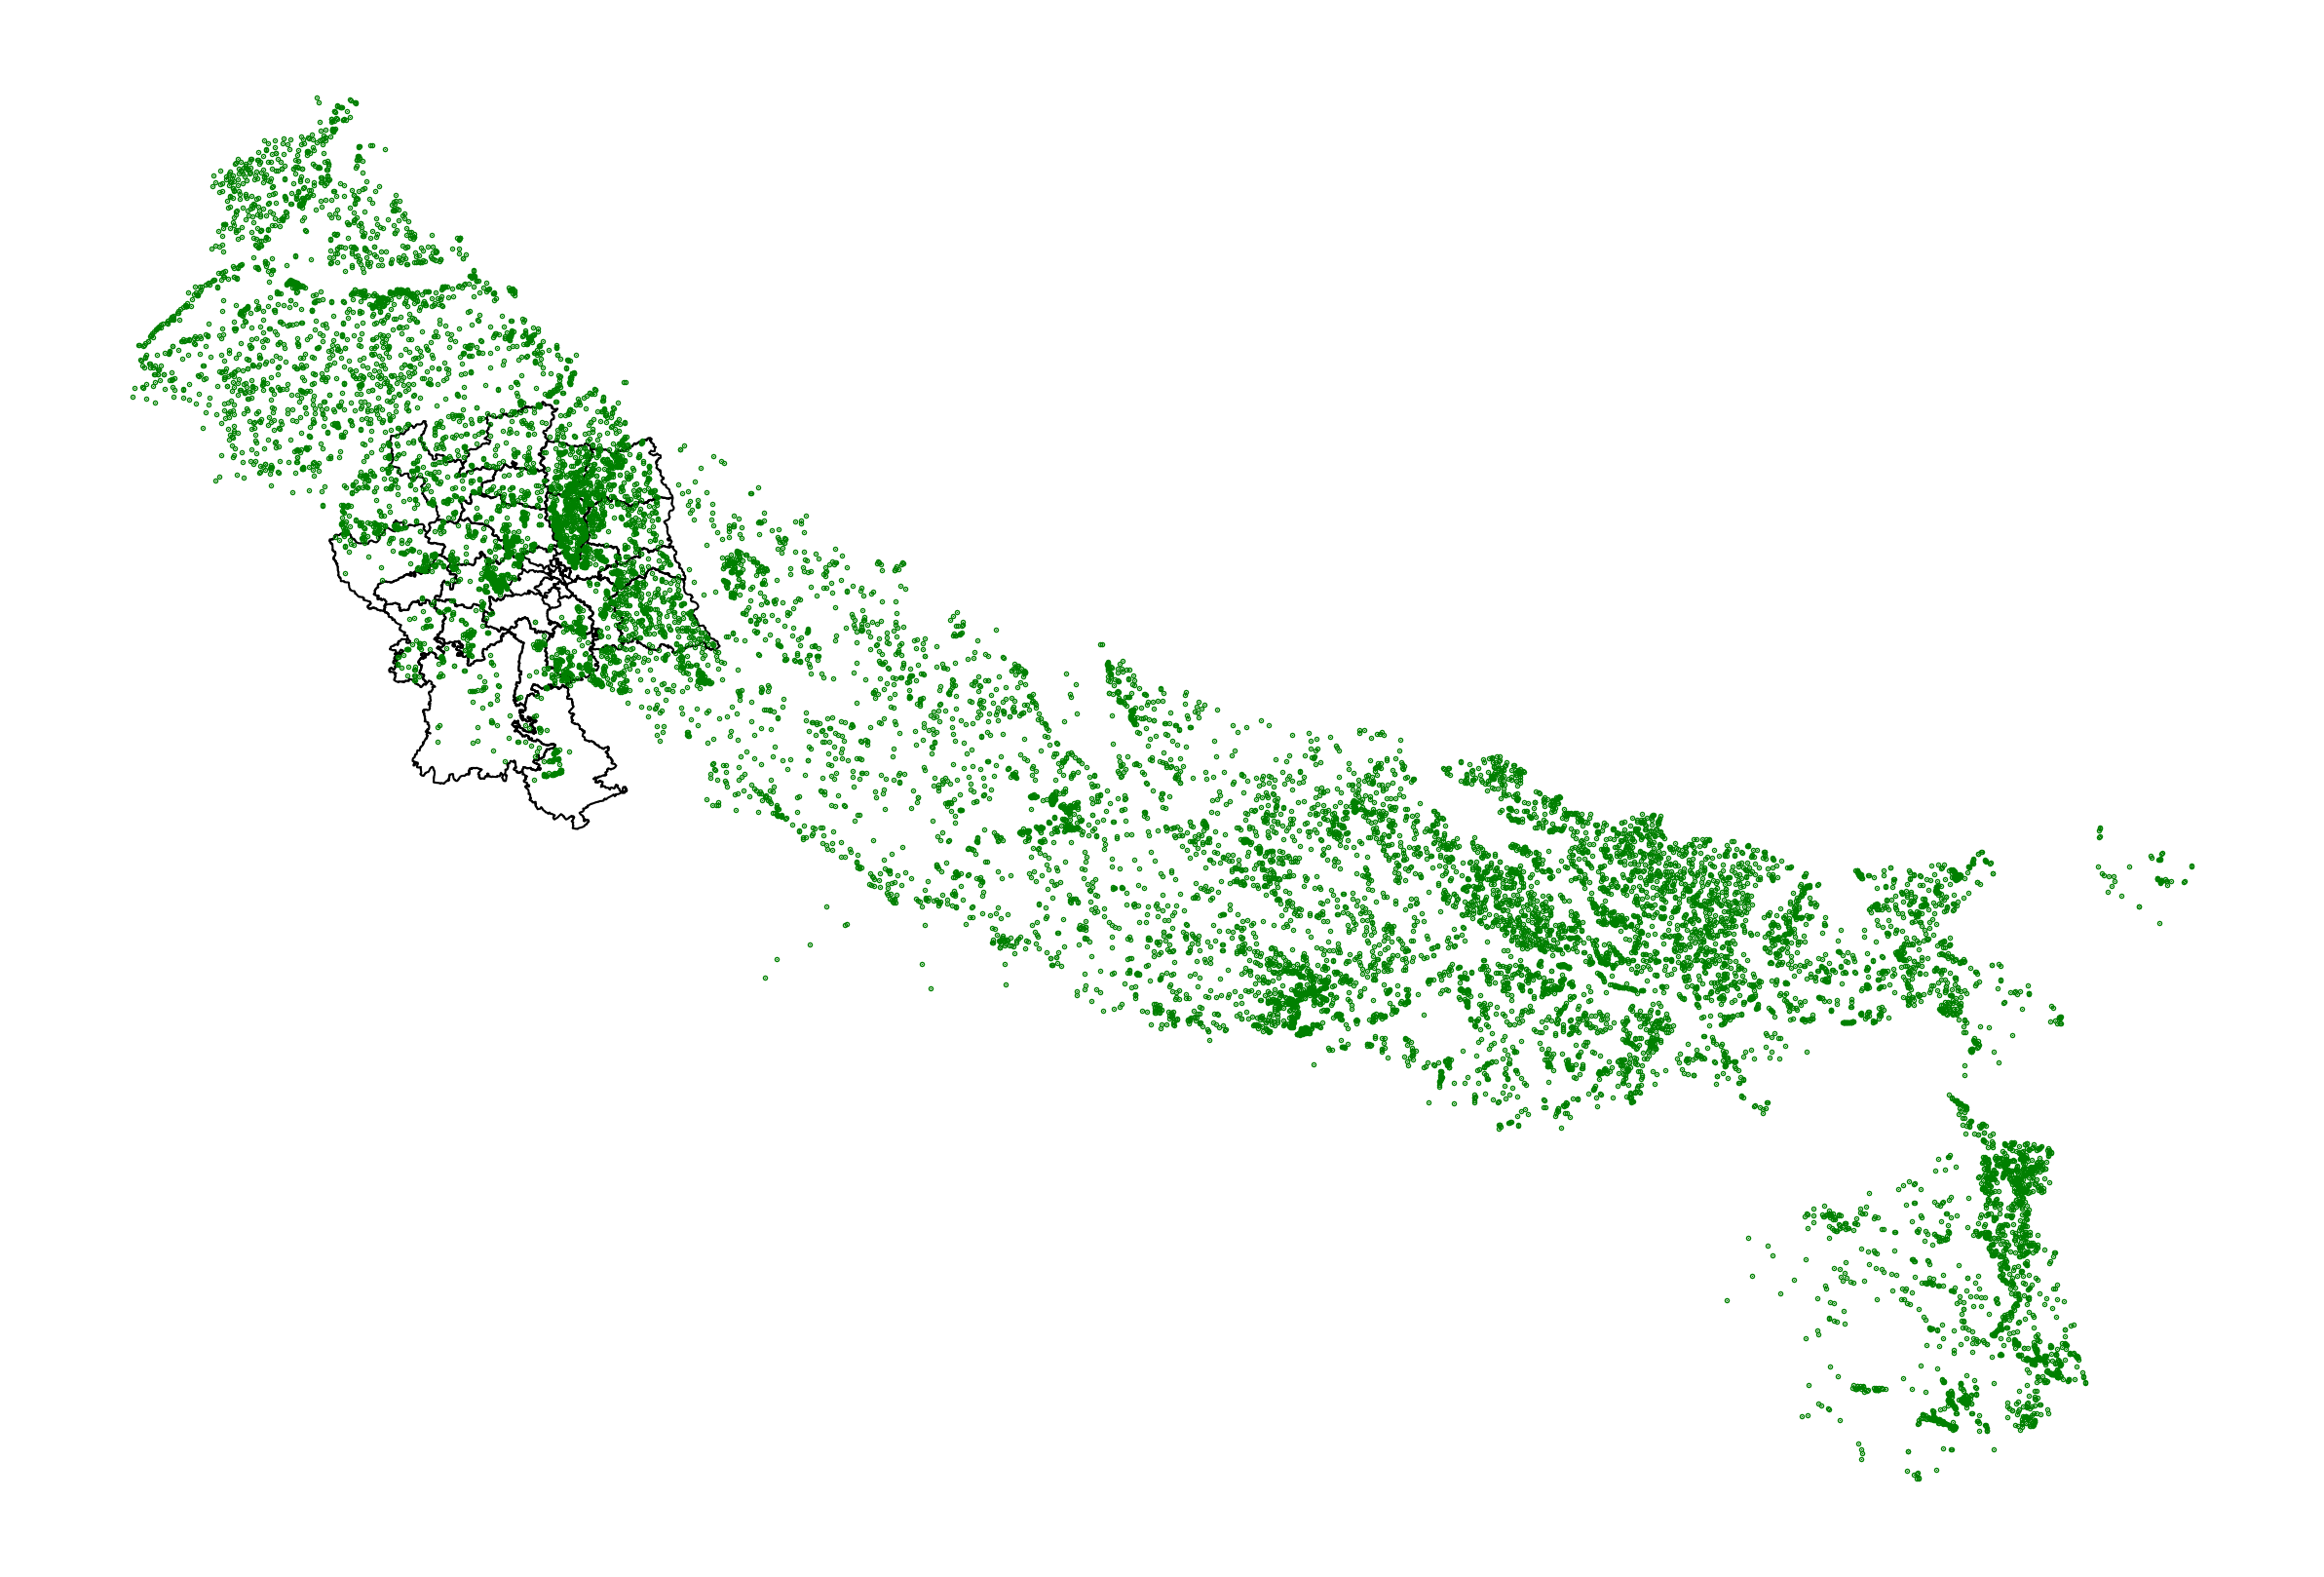

In [35]:
# latexify(5, 2, font_size=10)

kiln_tech = "CFCBK"
kiln_tech = "FCBK"
kiln_tech = "Zigzag"

fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

# scatter plot of the kiln locations
CFCBK_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "CFCBK"]
FCBK_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "FCBK"]
Zigzag_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "Zigzag"]
CFCBK_kilns_2 = all_kilns_gdf_2[all_kilns_gdf_2["class_name"] == "CFCBK"]
FCBK_kilns_2 = all_kilns_gdf_2[all_kilns_gdf_2["class_name"] == "FCBK"]
Zigzag_kilns_2 = all_kilns_gdf_2[all_kilns_gdf_2["class_name"] == "Zigzag"]
CFCBK_kilns_3 = all_kilns_gdf_3[all_kilns_gdf_3["class_name"] == "CFCBK"]
FCBK_kilns_3 = all_kilns_gdf_3[all_kilns_gdf_3["class_name"] == "FCBK"]
Zigzag_kilns_3 = all_kilns_gdf_3[all_kilns_gdf_3["class_name"] == "Zigzag"]


if kiln_tech == "CFCBK":
    ax.scatter(CFCBK_kilns.center_lon, CFCBK_kilns.center_lat, s=0.1, color='red')
    ax.scatter(CFCBK_kilns_2.center_lon, CFCBK_kilns_2.center_lat, s=0.1, color='red')
    ax.scatter(CFCBK_kilns_3.center_lon, CFCBK_kilns_3.center_lat, s=0.1, color='red')
elif kiln_tech == "FCBK":
    ax.scatter(FCBK_kilns.center_lon, FCBK_kilns.center_lat, s=0.1, color='orange')
    ax.scatter(FCBK_kilns_2.center_lon, FCBK_kilns_2.center_lat, s=0.1, color='orange')
    ax.scatter(FCBK_kilns_3.center_lon, FCBK_kilns_3.center_lat, s=0.1, color='orange')

elif kiln_tech == "Zigzag":
    ax.scatter(Zigzag_kilns.center_lon, Zigzag_kilns.center_lat, s=0.1, color='green')
    ax.scatter(Zigzag_kilns_2.center_lon, Zigzag_kilns_2.center_lat, s=0.1, color='green')
    ax.scatter(Zigzag_kilns_3.center_lon, Zigzag_kilns_3.center_lat, s=0.1, color='green')

ax.set_aspect("equal")
ax.set_axis_off()

22
0
0


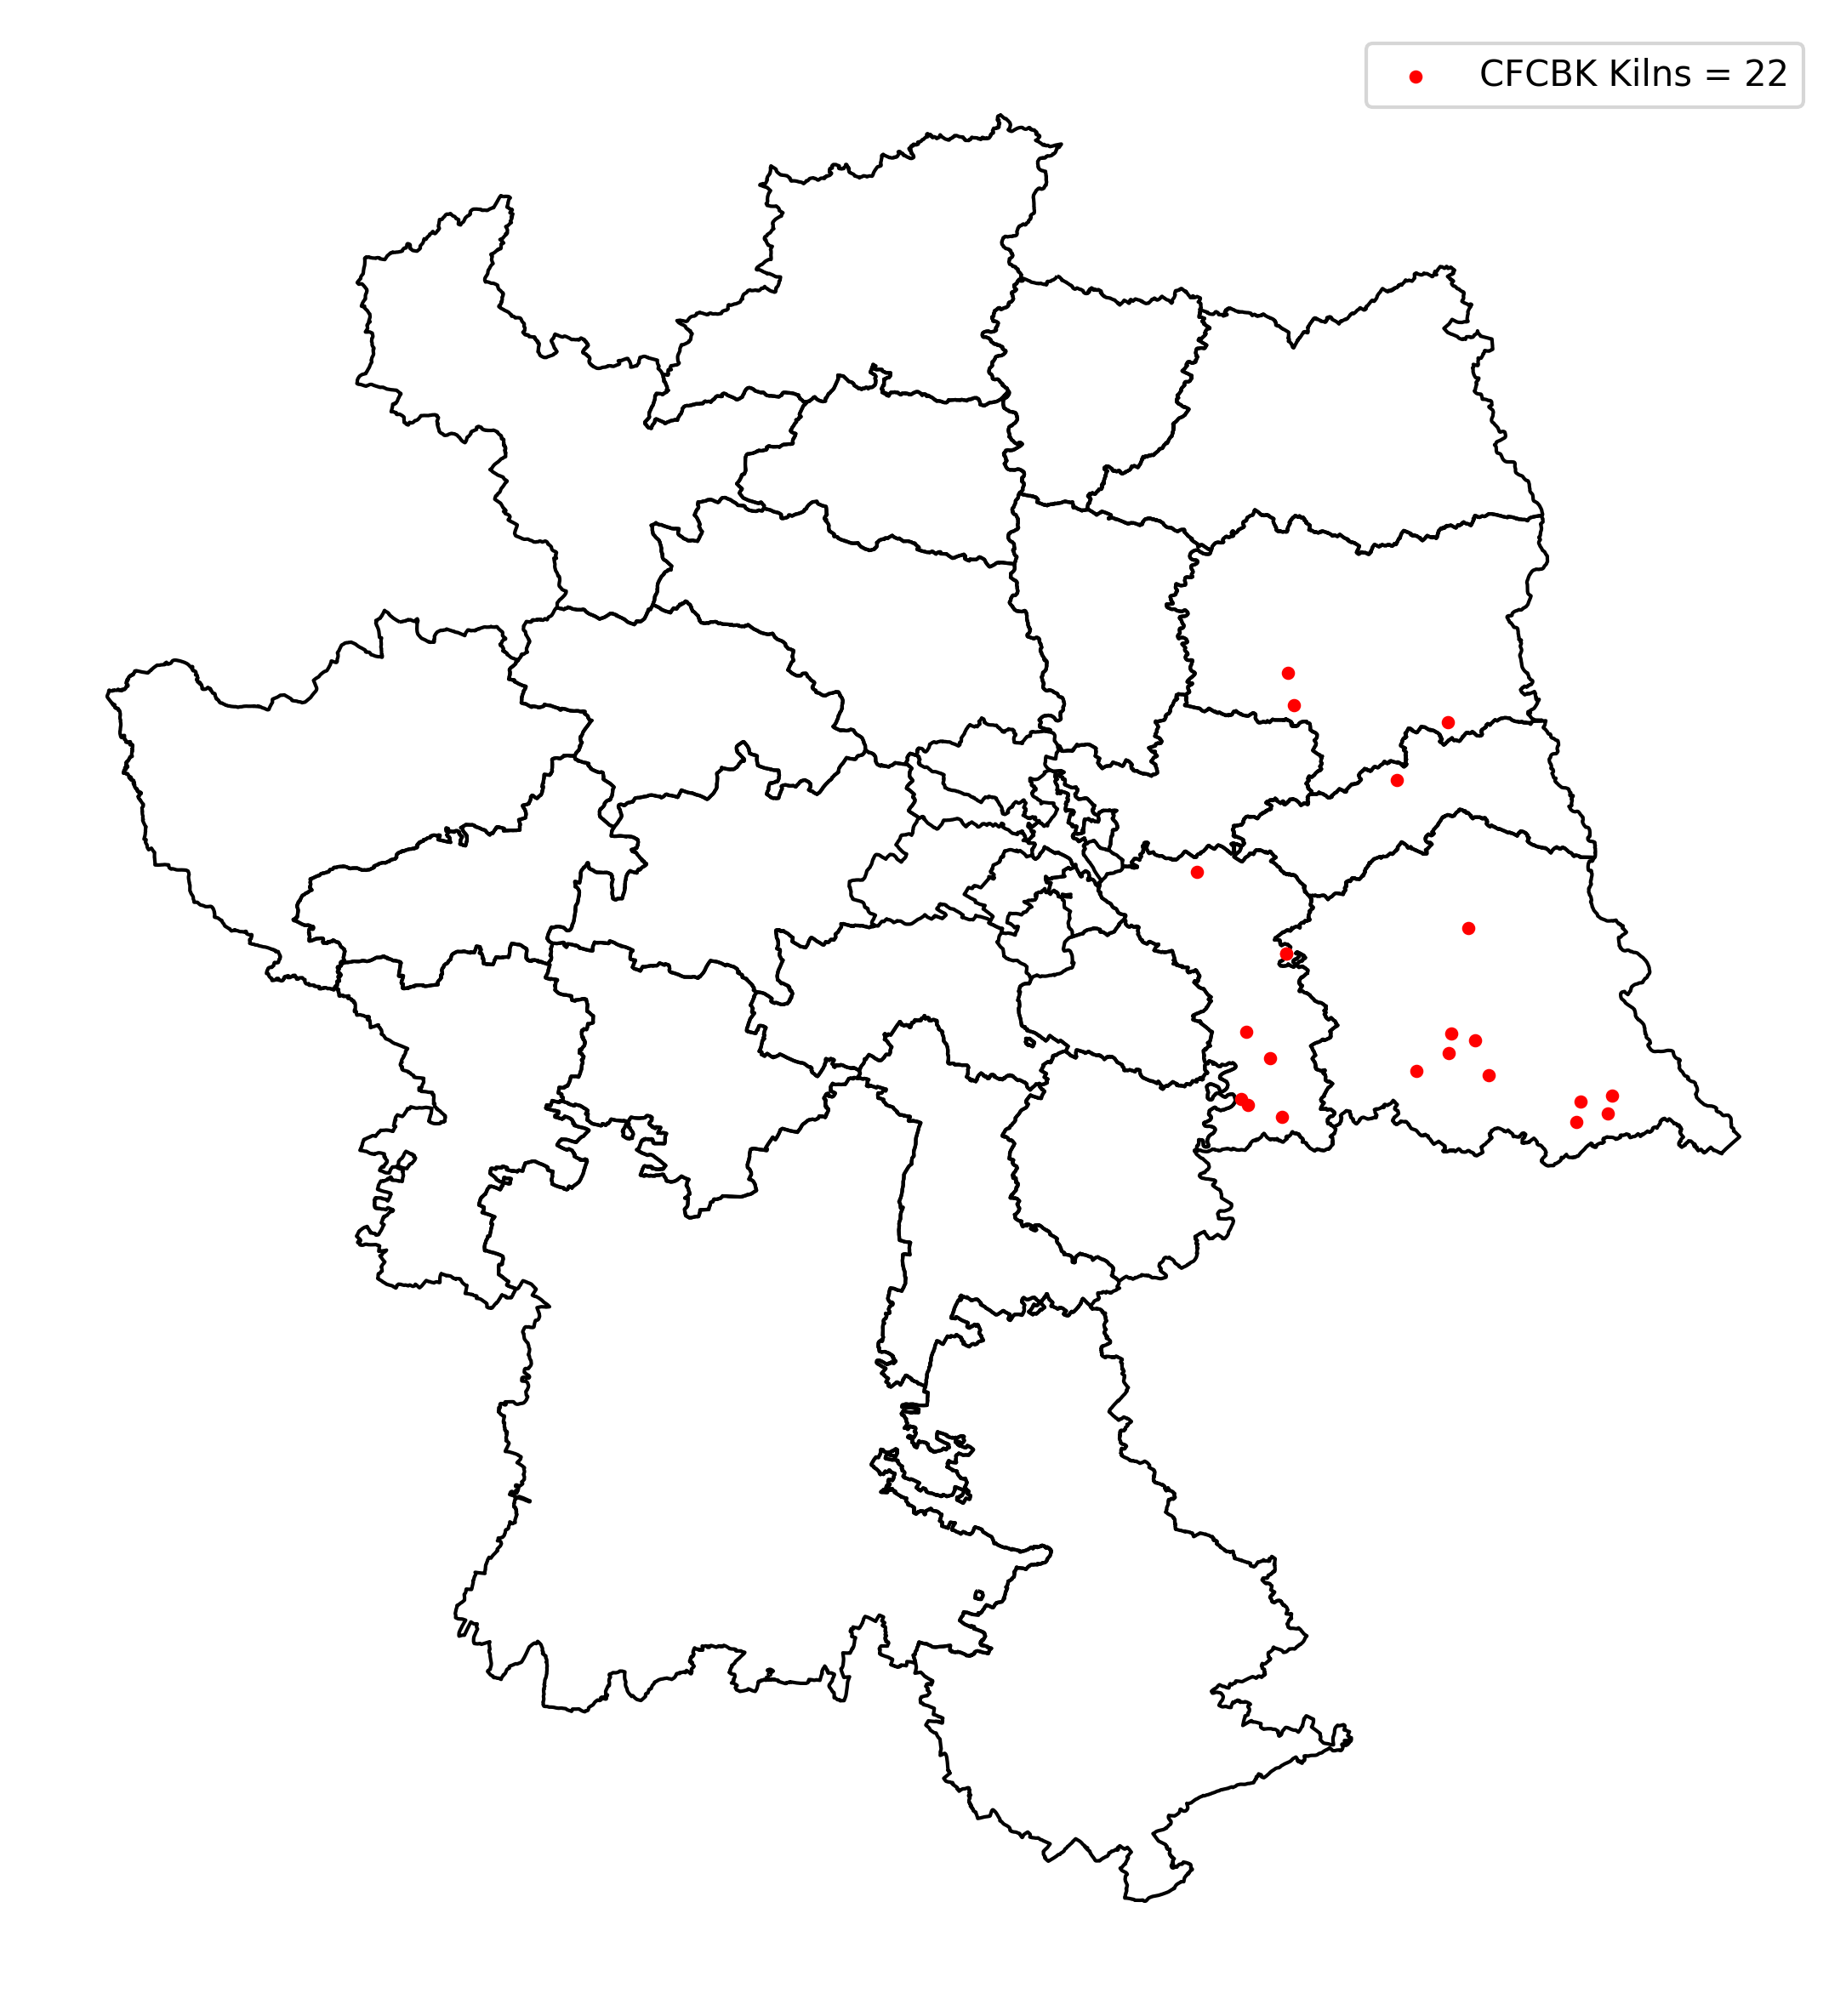

In [36]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Filter the kilns within NCR boundaries using a spatial join
# ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")

kiln_tech = "CFCBK"
if kiln_tech == "CFCBK":
    filtered_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "CFCBK"]
    filtered_kilns_2 = ncr_kilns_gdf_2[ncr_kilns_gdf_2["class_name"] == "CFCBK"]
    filtered_kilns_3 = ncr_kilns_gdf_3[ncr_kilns_gdf_3["class_name"] == "CFCBK"]
    print(len(filtered_kilns))
    print(len(filtered_kilns_2))
    print(len(filtered_kilns_3))
    total_kilns = len(filtered_kilns) + len(filtered_kilns_2) + len(filtered_kilns_3)
    
    color = 'red'
elif kiln_tech == "FCBK":
    filtered_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "FCBK"]
    filtered_kilns_2 = ncr_kilns_gdf_2[ncr_kilns_gdf_2["class_name"] == "FCBK"]
    filtered_kilns_3 = ncr_kilns_gdf_3[ncr_kilns_gdf_3["class_name"] == "FCBK"]

    print(len(filtered_kilns))
    print(len(filtered_kilns_2))
    print(len(filtered_kilns_3))
    total_kilns = len(filtered_kilns) + len(filtered_kilns_2) + len(filtered_kilns_3)

    color = 'orange'
elif kiln_tech == "Zigzag":
    filtered_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "Zigzag"]
    filtered_kilns_2 = ncr_kilns_gdf_2[ncr_kilns_gdf_2["class_name"] == "Zigzag"]
    filtered_kilns_3 = ncr_kilns_gdf_3[ncr_kilns_gdf_3["class_name"] == "Zigzag"]

    print(len(filtered_kilns))
    print(len(filtered_kilns_2))
    print(len(filtered_kilns_3))
    total_kilns = len(filtered_kilns) + len(filtered_kilns_2) + len(filtered_kilns_3)
    color = 'green'
else:
    raise ValueError("Invalid kiln technology specified!")

fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=1)
ax.scatter(filtered_kilns.center_lon, filtered_kilns.center_lat, s=7.5, color=color)
ax.scatter(filtered_kilns_2.center_lon, filtered_kilns_2.center_lat, s=7.5, color=color)
ax.scatter(filtered_kilns_3.center_lon, filtered_kilns_3.center_lat, s=7.5, color=color)
ax.set_aspect("equal")
ax.set_axis_off()
ax.legend([f"{kiln_tech} Kilns = {total_kilns}"], loc="upper right", fontsize=10)
# ax.set_title(f"Brick Kilns in NCR (Technology: {kiln_tech})")
fig.savefig(f"../figures/ncr_kilns_{kiln_tech}.png", bbox_inches="tight", dpi=300)
plt.show()


Number of CFCBK kilns: 22
Number of FCBK kilns: 278
Number of Zigzag kilns: 3111


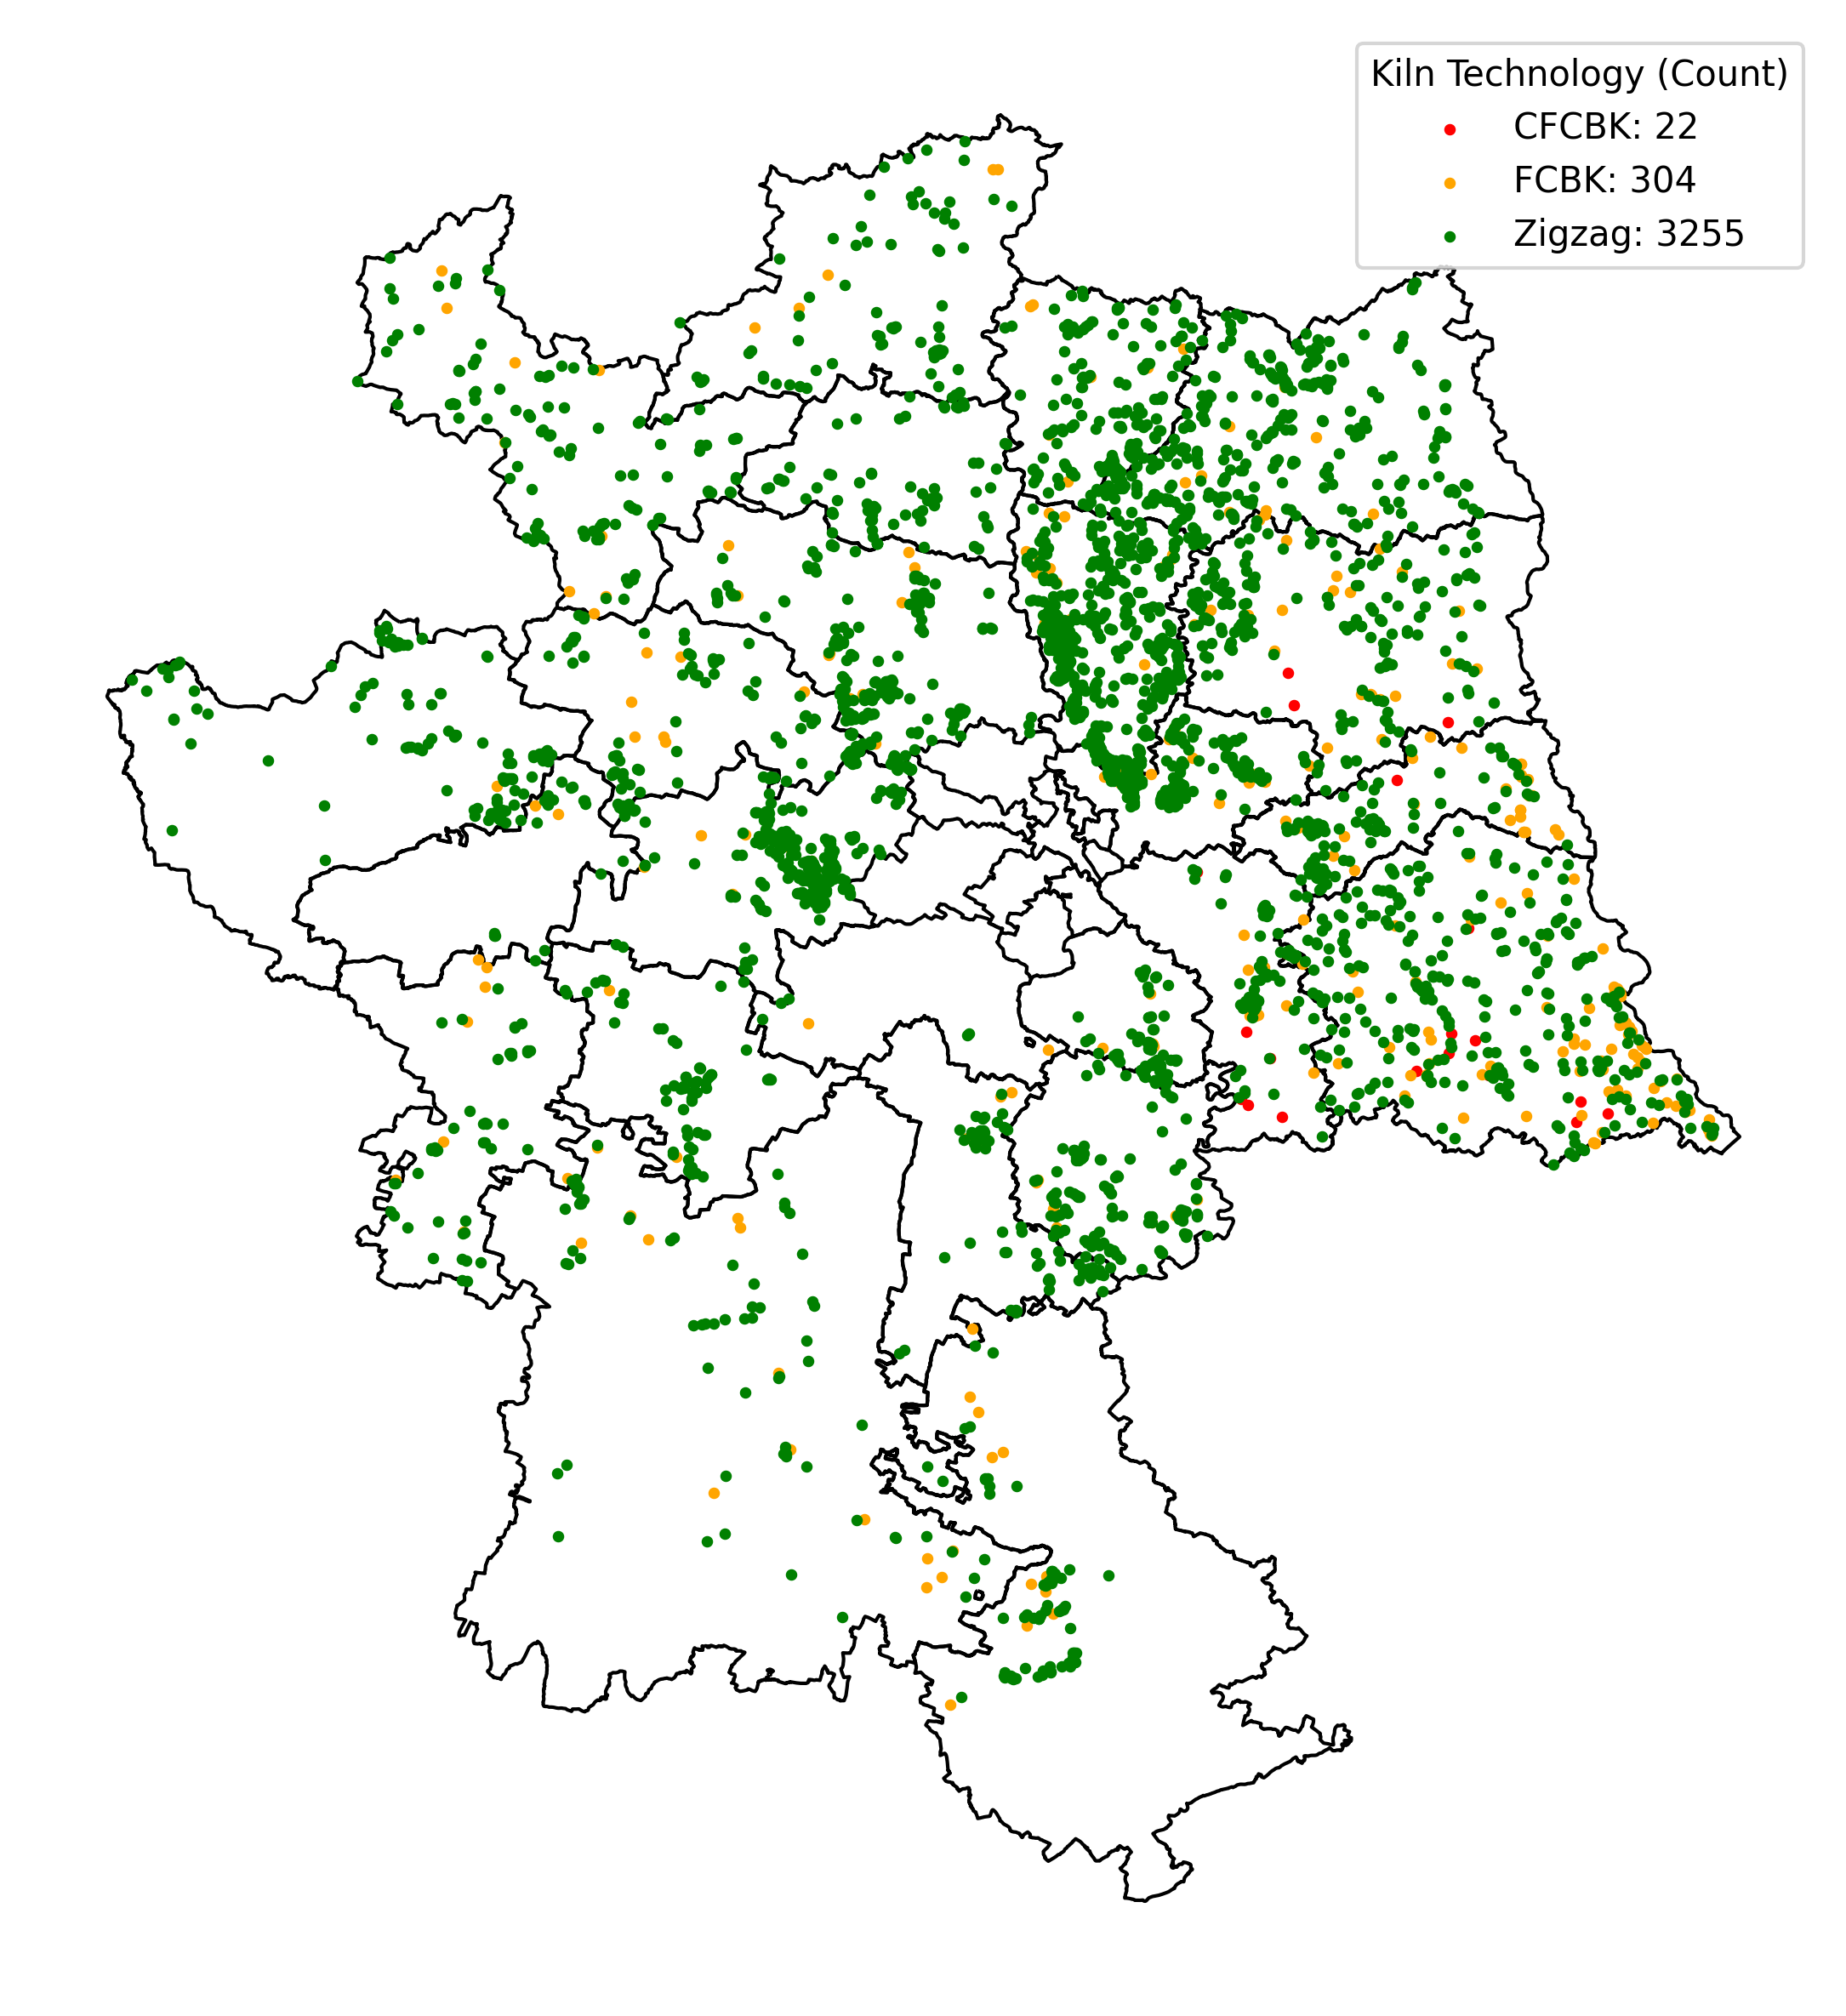

In [37]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Filter the kilns within NCR boundaries using a spatial join
ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")

# Separate kilns by technology and count them
CFCBK_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "CFCBK"]
FCBK_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "FCBK"]
Zigzag_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "Zigzag"]
CFCBK_kilns_2 = ncr_kilns_gdf_2[ncr_kilns_gdf_2["class_name"] == "CFCBK"]
FCBK_kilns_2 = ncr_kilns_gdf_2[ncr_kilns_gdf_2["class_name"] == "FCBK"]
Zigzag_kilns_2 = ncr_kilns_gdf_2[ncr_kilns_gdf_2["class_name"] == "Zigzag"]
CFCBK_kilns_3 = ncr_kilns_gdf_3[ncr_kilns_gdf_3["class_name"] == "CFCBK"]
FCBK_kilns_3 = ncr_kilns_gdf_3[ncr_kilns_gdf_3["class_name"] == "FCBK"]
Zigzag_kilns_3 = ncr_kilns_gdf_3[ncr_kilns_gdf_3["class_name"] == "Zigzag"]


num_CFCBK = len(CFCBK_kilns)
num_FCBK = len(FCBK_kilns)
num_Zigzag = len(Zigzag_kilns)
num_CFCBK_2 = len(CFCBK_kilns_2)
num_FCBK_2 = len(FCBK_kilns_2)
num_Zigzag_2 = len(Zigzag_kilns_2)
num_CFCBK_3 = len(CFCBK_kilns_3)
num_FCBK_3 = len(FCBK_kilns_3)
num_Zigzag_3 = len(Zigzag_kilns_3)
total_fcbk = num_FCBK + num_FCBK_2 + num_FCBK_3
total_cfbck = num_CFCBK + num_CFCBK_2 + num_CFCBK_3
total_zigzag = num_Zigzag + num_Zigzag_2 + num_Zigzag_3
total_kilns = total_fcbk + total_cfbck + total_zigzag

# Print counts for confirmation
print(f"Number of CFCBK kilns: {num_CFCBK}")
print(f"Number of FCBK kilns: {num_FCBK}")
print(f"Number of Zigzag kilns: {num_Zigzag}")

# Plot
fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=1)

# Scatter plot for each kiln type with counts in the legend
scatter_CFCBK = ax.scatter(CFCBK_kilns.center_lon, CFCBK_kilns.center_lat, s=5, color='red', label=f"CFCBK: {total_cfbck}")
scatter_FCBK = ax.scatter(FCBK_kilns.center_lon, FCBK_kilns.center_lat, s=5, color='orange', label=f"FCBK: {total_fcbk}")
scatter_Zigzag = ax.scatter(Zigzag_kilns.center_lon, Zigzag_kilns.center_lat, s=5, color='green', label=f"Zigzag: {total_zigzag}")
scatter_CFCBK_2 = ax.scatter(CFCBK_kilns_2.center_lon, CFCBK_kilns_2.center_lat, s=5,color='red')
scatter_FCBK_2 = ax.scatter(FCBK_kilns_2.center_lon, FCBK_kilns_2.center_lat, s=5,color='orange')
scatter_Zigzag_2 = ax.scatter(Zigzag_kilns_2.center_lon, Zigzag_kilns_2.center_lat, s=5,color='green')
scatter_CFCBK_3 = ax.scatter(CFCBK_kilns_3.center_lon, CFCBK_kilns_3.center_lat, s=5,color='red')
scatter_FCBK_3 = ax.scatter(FCBK_kilns_3.center_lon, FCBK_kilns_3.center_lat, s=5,color='orange')
scatter_Zigzag_3 = ax.scatter(Zigzag_kilns_3.center_lon, Zigzag_kilns_3.center_lat, s=5,color='green')


# Add legend with formatted labels
ax.legend(title="Kiln Technology (Count)", loc="upper right", fontsize=10)

# Formatting the plot
ax.set_aspect("equal")
ax.set_axis_off()

# Save the figure
fig.savefig("../figures/ncr_all_kilns_with_legend_counts.png", bbox_inches="tight", dpi=300)

plt.show()
